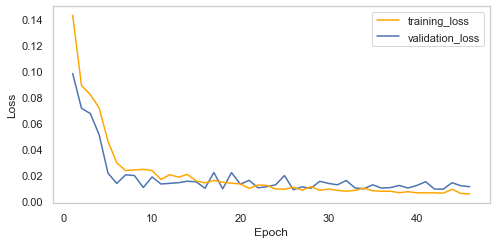

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

history = np.load('history.npy', allow_pickle='TRUE').item()

training_loss = history["loss"]
test_loss = history["val_loss"]
epoch_count = range(1, len(training_loss) + 1)

matplotlib.rcParams.update({'font.size': 15})
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(7, 3.5))
ax.plot(epoch_count, training_loss, c='orange', zorder=1)
ax.plot(epoch_count, test_loss, "b-", zorder=0)
ax.grid(False)
plt.legend(["training_loss", "validation_loss"])
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax.tick_params(direction='in', pad=10, which='both')
ax.minorticks_on()
plt.tight_layout()
plt.savefig('../figure/fi3.png', dpi=300, bbox_inches='tight')
plt.show()


(890, 1280)


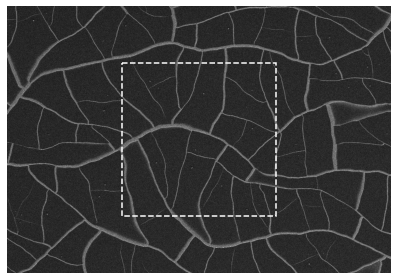

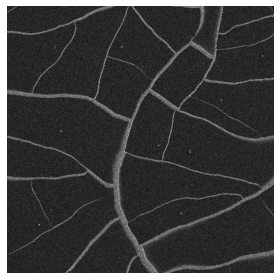

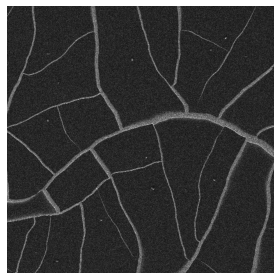

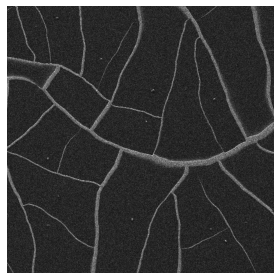

In [45]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy


def rotateit(image, theta):
    return scipy.ndimage.rotate(image, float(theta), reshape=False, mode='nearest')


def flipit(image, bool, type='ver'):
    if bool == 1:
        if type == 'ver':
            image = np.fliplr(image)
        else:
            image = np.flip(image)
    else:
        image = image
    return image


img = cv2.imread('../data/raw_data/0.242/2000/2000 rpm + 30 min (1).jpg', cv2.IMREAD_GRAYSCALE)[0:890, :]
print(np.shape(img))

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.set_axis_off()
ax.grid(False)
ax.add_patch(
    patches.Rectangle(
        (384, 189),
        512,
        512,
        edgecolor='white',
        facecolor='black',
        fill=False, lw=1.5, ls='--'
    ))
plt.tight_layout()
plt.savefig('../figure/fig4_trans.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

img_copy = img[189:189 + 512, 384:384 + 512]

ro = rotateit(img_copy, 90)
fig, ax = plt.subplots()
ax.imshow(ro, cmap='gray')
ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
plt.savefig('../figure/fig4_rotate.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

fl = flipit(img_copy, 1)
fig, ax = plt.subplots()
ax.imshow(fl, cmap='gray')
ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
plt.savefig('../figure/fig4_fl.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

fl_ho = flipit(img_copy, 1, type='ho')
fig, ax = plt.subplots()
ax.imshow(fl_ho, cmap='gray')
ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
plt.savefig('../figure/fig4_fl_ho.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


In [37]:
import glob
import sys
import os
import numpy as np
import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras
from functools import partial
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

def data_load(path):
    files = glob.glob(path)
    if not files:
        print("Chck Path")
        sys.exit()

    _feature=[]
    label=[]
    count = 0
    for address in tqdm.tqdm(files):
        if count ==0:
            _feature=np.array([np.load(address)])
            label_ = os.path.basename(address)[:-4].split('_')[-1]
            label.append([label_])
            count = count + 1
        else:
            label_ = os.path.basename(address)[:-4].split('_')[-1]

            _feature=np.append(_feature, np.array([np.load(address)]),axis=0)
            label.append([label_])

    target = np.array(label).flatten()
    print(np.shape(_feature))
    return _feature, target.reshape((-1,1))



X_train, y_train = data_load('../data/train_set/*')
scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train)
X_test, y_test = data_load('../data/test_set/*')
y_test_ans = y_test
y_test = scaler.transform(y_test)


X_train,  X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3,stratify=y_train)
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

100%|██████████| 1110/1110 [00:59<00:00, 18.55it/s]


(1110, 512, 512, 1)


100%|██████████| 37/37 [00:00<00:00, 105.74it/s]


(37, 512, 512, 1)


In [42]:
from tensorflow.keras.models import load_model

model= load_model("VGG2.h5")
score = model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 41ms/step - loss: 0.0101 - mse: 0.0101


In [40]:

ans = model.predict(X_test)
pred_ans = scaler.inverse_transform(ans)
np.hstack((pred_ans,y_test_ans))

array([['11.549053', '5.5'],
       ['8.793058', '5.5'],
       ['4.8758893', '5.5'],
       ['9.660971', '8.3'],
       ['9.921701', '8.3'],
       ['12.902986', '8.3'],
       ['20.62871', '15.8'],
       ['21.119696', '23.0'],
       ['17.933313', '23.0'],
       ['24.000824', '23.0'],
       ['14.822365', '28.8'],
       ['23.714725', '28.8'],
       ['28.574455', '28.8'],
       ['21.78174', '18.5'],
       ['24.049274', '18.5'],
       ['13.20938', '18.5'],
       ['29.742336', '30.5'],
       ['29.615458', '30.5'],
       ['29.37511', '30.5'],
       ['44.75094', '39.5'],
       ['43.918602', '39.5'],
       ['44.291496', '39.5'],
       ['44.37274', '50.3'],
       ['46.06413', '50.3'],
       ['42.554493', '50.3'],
       ['65.77742', '74.3'],
       ['56.218365', '74.3'],
       ['55.41756', '74.3'],
       ['32.464172', '20.3'],
       ['32.11516', '20.3'],
       ['22.221375', '20.3'],
       ['50.99876', '46.0'],
       ['45.701565', '46.0'],
       ['44.6', '46.0'],
     

predict : [4.8758893] ansower : ['5.5']


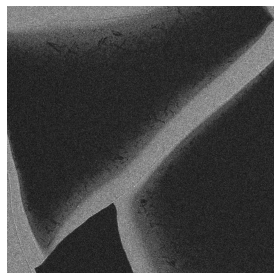

predict : [9.921701] ansower : ['8.3']


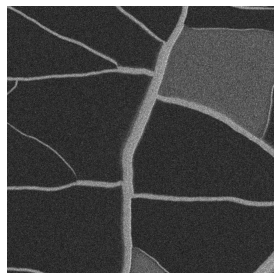

predict : [24.000824] ansower : ['23.0']


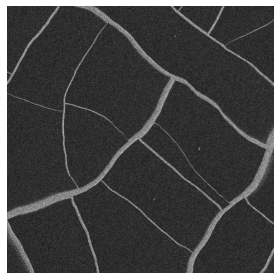

predict : [28.574455] ansower : ['28.8']


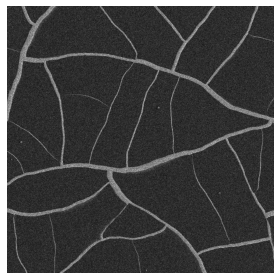

In [49]:
for i in [2, 4, 9,12]:
    print('predict :', pred_ans[i], 'ansower :', y_test_ans[i])

    fig, ax = plt.subplots()
    ax.imshow(X_test[i,:,:], cmap='gray')
    ax.set_axis_off()
    ax.grid(False)
    plt.tight_layout()
    plt.savefig('../figure/fig5_0.363_{}_{}.png'.format(str(pred_ans[i]),str(y_test_ans[i])), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 512, 512, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 512, 512, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 128)     73856     
_________________________________________________________________
activation_2 (Activation)    (None, 256, 256, 128)     0

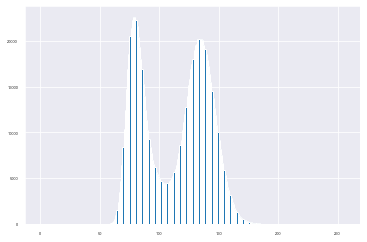

In [8]:
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('../data/raw_data/0.363/2000/2000 rpm + 30 min (3).jpg', cv2.IMREAD_GRAYSCALE)[0:890,]
# hist, bin = np.histogram(img.flatten(), 256, [0, 256])
plt.hist(img.ravel(), 256, [0,256])
plt.show()

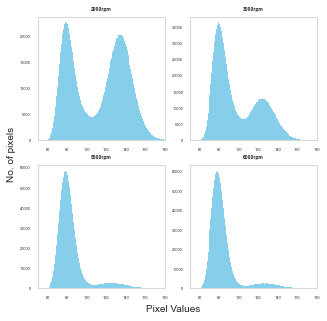

In [37]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../data/raw_data/0.363/2000/2000 rpm + 30 min (3).jpg', cv2.IMREAD_GRAYSCALE)[0:890,]
img2 = cv2.imread('../data/raw_data/0.363/3000/3000 rpm + 30 min  (1).jpg', cv2.IMREAD_GRAYSCALE)[0:890,]
img3 = cv2.imread('../data/raw_data/0.363/5000/5000 rpm + 30 min (3).jpg', cv2.IMREAD_GRAYSCALE)[0:890,]
img4 = cv2.imread('../data/raw_data/0.363/6000/6000 rpm + 30 min (3).jpg', cv2.IMREAD_GRAYSCALE)[0:890,]


fig, ax = plt.subplots(2,2,figsize=(5, 5))

ax[0][0].hist(img.ravel(), 256, [0,256],color = "skyblue", lw=0)
ax[0][1].hist(img2.ravel(), 256, [0,256],color = "skyblue", lw=0)
ax[1][0].hist(img3.ravel(), 256, [0,256],color = "skyblue", lw=0)
ax[1][1].hist(img4.ravel(), 256, [0,256],color = "skyblue", lw=0)

# ax[0][0].patch.set_facecolor('white')
# ax[0][1].patch.set_facecolor('white')
# ax[1][0].patch.set_facecolor('white')
# ax[1][1].patch.set_facecolor('white')

ax[0][0].set_xlim(50,180)
ax[0][1].set_xlim(50,180)
ax[1][0].set_xlim(50,180)
ax[1][1].set_xlim(50,180)

ax[0][0].grid(False)
ax[0][1].grid(False)
ax[1][0].grid(False)
ax[1][1].grid(False)

ax[0][0].set_title('2000rpm', fontweight='bold', fontsize=5)
ax[0][1].set_title('3000rpm', fontweight='bold', fontsize=5)
ax[1][0].set_title('5000rpm', fontweight='bold', fontsize=5)
ax[1][1].set_title('6000rpm', fontweight='bold', fontsize=5)

fig.text(0.5, 0.06, 'Pixel Values', ha='center', fontsize=10)
fig.text(0.04, 0.5, 'No. of pixels', va='center', rotation='vertical', fontsize=10)

# plt.xlabel("Pixel Values", fontsize=15, fontweight='bold')
# plt.ylabel("No. of pixels", fontsize=15, fontweight='bold')

# plt.xlabel('X-Axis', fontsize=15, fontweight='bold')
# plt.tight_layout()
plt.savefig('../figure/fig6.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()



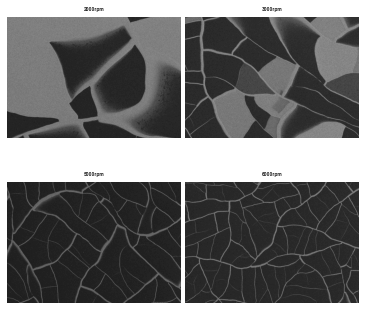

In [40]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../data/raw_data/0.363/2000/2000 rpm + 30 min (3).jpg', cv2.IMREAD_GRAYSCALE)[0:890,]
img2 = cv2.imread('../data/raw_data/0.363/3000/3000 rpm + 30 min  (1).jpg', cv2.IMREAD_GRAYSCALE)[0:890,]
img3 = cv2.imread('../data/raw_data/0.363/5000/5000 rpm + 30 min (3).jpg', cv2.IMREAD_GRAYSCALE)[0:890,]
img4 = cv2.imread('../data/raw_data/0.363/6000/6000 rpm + 30 min (3).jpg', cv2.IMREAD_GRAYSCALE)[0:890,]


fig, ax = plt.subplots(2,2,figsize=(5, 5))

ax[0][0].imshow(img,cmap='gray')
ax[0][1].imshow(img2,cmap='gray')
ax[1][0].imshow(img3,cmap='gray')
ax[1][1].imshow(img4,cmap='gray')


ax[0][0].axis("off")
ax[0][1].axis("off")
ax[1][0].axis("off")
ax[1][1].axis("off")

ax[0][0].set_title('2000rpm', fontweight='bold', fontsize=5)
ax[0][1].set_title('3000rpm', fontweight='bold', fontsize=5)
ax[1][0].set_title('5000rpm', fontweight='bold', fontsize=5)
ax[1][1].set_title('6000rpm', fontweight='bold', fontsize=5)

plt.tight_layout()
plt.savefig('../figure/fig7.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

